## 01.- K-Medias

### a) Importación de las librerías

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### b) Importación del conjunto de datos

In [37]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

### c) Método del codo para hallar el número óptimo de conglomerados

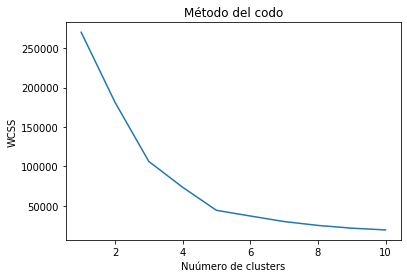

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Nuúmero de clusters')
plt.ylabel('WCSS')
plt.show()

### d) Entrenamiento del modelo K-Means en el conjunto de datos

In [39]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### e) Visualización de las agrupaciones

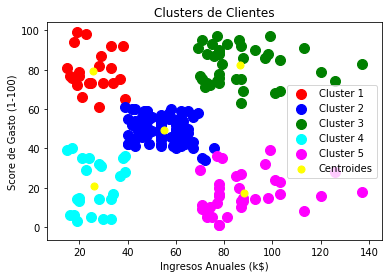

In [40]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Score de Gasto (1-100)')
plt.legend()
plt.show()

El algoritmo K-Means es una técnica de agrupamiento (clustering) que se utiliza en aprendizaje automático y minería de datos para dividir un conjunto de datos en grupos o clústeres basados en similitudes entre los datos. K-Means es un algoritmo iterativo que busca encontrar los centros de los clústeres y asignar puntos de datos al clúster más cercano. A continuación, proporcionaré una descripción detallada del algoritmo K-Means con enfoque matemático:

### 1. Definiciones Básicas
- $K$: El número de clústeres deseado.
- $N$: El número de puntos de datos en el conjunto de datos.
- $X$: Conjunto de datos con $N$ puntos, donde $X = \{x_1, x_2, \ldots, x_N\}$.
- $C$: Conjunto de centroides de clústeres, donde $C = \{c_1, c_2, \ldots, c_K\}$.
- $S$: Conjunto de índices de clústeres, donde $S = \{s_1, s_2, \ldots, s_N\}$. $s_i$ representa el índice del clúster al que pertenece $x_i$.

### 2. Objetivo del Algoritmo
El objetivo de K-Means es minimizar la suma de las distancias cuadradas entre cada punto de datos y el centroide de su clúster asignado. Esto se conoce como la función de costo o inercia, y se define como:

$$ J(C, S) = \sum_{i=1}^{N} \|x_i - c_{s_i}\|^2 $$

Donde $ \|x_i - c_{s_i}\| $ es la distancia euclidiana entre $x_i$ y su centroide $c_{s_i}$.

### 3. Pasos del Algoritmo
El algoritmo K-Means sigue los siguientes pasos:

#### a. Inicialización de Centroides
Se eligen aleatoriamente $K$ puntos de datos como los centroides iniciales de los clústeres.

#### b. Asignación de Puntos a Clústeres
Para cada punto de datos $x_i$, se calcula la distancia entre $x_i$ y todos los centroides $c_j$. $x_i$ se asigna al clúster cuyo centroide esté más cerca (es decir, $s_i$ se establece en el índice del clúster más cercano).

$$ s_i = \text{argmin}_{j} \|x_i - c_j\|^2 $$

#### c. Actualización de Centroides
Se recalculan los centroides de los clústeres como el promedio de todos los puntos de datos asignados a ese clúster.

$$ c_j = \frac{1}{|S_j|} \sum_{i \in S_j} x_i $$

Donde $|S_j|$ es el número de puntos de datos asignados al clúster $j$.

#### d. Convergencia
Se repiten los pasos b y c hasta que no haya cambios en la asignación de puntos a clústeres o se alcance un número máximo de iteraciones.

### 4. Selección de $K$
La selección del valor adecuado de $K$ (número de clústeres) es un aspecto importante del algoritmo K-Means. No existe una regla única para determinar $K$, y se pueden utilizar diversas técnicas, como el método del codo (Elbow Method) o el índice de silueta (Silhouette Score), para encontrar un valor óptimo de $K$ que minimice la inercia y maximice la cohesión entre clústeres.

### 5. Ventajas y Desventajas
- **Ventajas:**
  - Fácil de entender y de implementar.
  - Eficiente en términos computacionales.
  - Puede manejar grandes conjuntos de datos.
- **Desventajas:**
  - Sensible a la inicialización de centroides.
  - Puede converger a un óptimo local.
  - No funciona bien con clústeres de tamaños diferentes o con formas no esféricas.

### 6. Ejemplo Práctico
Supongamos que tienes un conjunto de datos que contiene información sobre clientes de una tienda en línea, como su historial de compras y su comportamiento de navegación en el sitio web. Deseas agrupar a los clientes en $K$ segmentos basados en sus comportamientos para personalizar las ofertas y recomendaciones. Puedes aplicar K-Means con un valor adecuado de $K$ para lograr este objetivo.

En resumen, K-Means es un algoritmo de agrupamiento que busca dividir un conjunto de datos en $K$ clústeres de manera que se minimice la distancia entre los puntos de datos y sus centroides asignados. Es una técnica ampliamente utilizada en la segmentación de clientes, análisis de datos y muchas otras aplicaciones.